<p> 
    <h4>Group Name: Hello world<h4>
    <h4>Group members:&nbsp;Ni Haokun&emsp;&nbsp;&nbsp;&nbsp;22455744<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Song Yihui&emsp;&nbsp;&nbsp;22422382<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Peng Yuchen&nbsp;&nbsp;22448683 <h4>
</p>


<h2>Outline<h2>
<h4><ol>
    <li>Background</li>
    <li>Topic</li>
    <li>Analysis</li>
        <ul>   
            <li>Problem</li>
            <li>Coding</li>
            <li>Visualization</li>
            <li>Analysis</li>
        </ul>
    <li>Conclusion</li>
</ol><h4>

<p align = "center"><img src = "image.jpg" width = "60%"></p>

<div>
    <h2>Background<h2>
    <h4><p>&nbsp;&nbsp;&nbsp;Many women in the world are suffered  crime every day, especially in some developing countries. Especially in Indian, local data shows that crimes against women remain unabated. And with tens of thousands of rape cases reported annually, India has earned the moniker "the rape capital of the world." According to World Bank study, new brides are often harassed for not binging in sufficient dowry and thousands are killed by their husbands and in-laws every year. Most are burnt to death and the murders are passed off as "kitchen accidents." In addition, it has consistently been the most reported violent crime against women. <br>&nbsp;&nbsp;&nbsp;This dataset has state-wise and district level data on the various crimes committed against women between 2001 to 2014. Some crimes that are included are Rape, Kidnapping and Abduction, Dowry Deaths etc.</p>
    <p>&nbsp;&nbsp;&nbsp;Data source:&nbsp;<a href = "https://data.gov.in">https://data.gov.in</a><br><a href = "https://www.kaggle.com/datasets/greeshmagirish/crime-against-women-20012014-india">&nbsp;&nbsp;&nbsp;https://www.kaggle.com/datasets/greeshmagirish/crime-against-women-20012014-india</a></p><h4>
</div>

<div>
    <h2>Topic<h2>
    <h4><p>&nbsp;&nbsp;&nbsp;In this project, we are committed to mining this dataset by using mathematical tools and analyize by using visualization tools. Furthermore, we want to know that which area are more crime-prone and relationship between each crimes.</p><h4>
</div>

<h2>Analysis<h2>

### Preparation: 

In [42]:
# If you need to install the package, please remove below two lines '#'
# %pip install plotly
# %pip install folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from folium.plugins import HeatMap
from plotly.tools import make_subplots as make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [43]:
current_path = os.getcwd()
data_path = current_path + '/' + 'crimes_against_women_2001-2014.csv'
crimes_df = pd.read_csv(data_path)
crimes_df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [44]:
# check null value
null_value = crimes_df.isnull().sum().sort_values(ascending=False)
null_value      # there is no NULL value, no need to drop null value

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [45]:
# columne 'Unnamed: 0' is not useful
crimes_df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [46]:
# convert to same case
crimes_df['STATE/UT'] = crimes_df['STATE/UT'].str.upper()
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].str.upper()

# convert to uniform format
crimes_df['STATE/UT'] = crimes_df['STATE/UT'].str.replace('&', 'AND', regex = True)
crimes_df['STATE/UT'] = crimes_df['STATE/UT'].str.replace('A AND N ISlANDS', 'ANDAMAN AND NICOBAR ISLANDS', regex = True)
crimes_df['STATE/UT'] = crimes_df['STATE/UT'].str.replace('D AND N HAVELI', 'DADRA AND NAGAR HAVELI', regex = True)

crimes_df.loc[crimes_df['STATE/UT'] == 'A AND N ISlANDS', 'STATE/UT'] = 'ANDAMAN AND NICOBAR ISLANDS'
crimes_df.loc[crimes_df['STATE/UT'] == 'D AND N HAVELI', 'STATE/UT'] = 'DADRA AND NAGAR HAVELI' 
crimes_df['STATE/UT'] = crimes_df['STATE/UT'].str.replace('AANDN ISLANDS', 'ANDAMAN AND NICOBAR ISLANDS', regex = True)
crimes_df.loc[crimes_df['STATE/UT'] == 'DANDN HAVELI', 'STATE/UT'] = 'DADRA AND NAGAR HAVELI' 
crimes_df.loc[crimes_df['STATE/UT'] == 'DELHI UT', 'STATE/UT'] = 'DELHI'
crimes_df['STATE/UT'] = crimes_df['STATE/UT'].str.replace('A AND N ISLANDS', 'ANDAMAN AND NICOBAR ISLANDS', regex = True)

print(crimes_df['STATE/UT'].sort_index().unique())
# delete 'total' value in ['DISTRICT'] column
crimes_df = crimes_df.drop(crimes_df[crimes_df['DISTRICT'] == 'TOTAL'].index)
len(crimes_df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL'
 'ANDAMAN AND NICOBAR ISLANDS' 'CHANDIGARH' 'DADRA AND NAGAR HAVELI'
 'DAMAN AND DIU' 'DELHI' 'LAKSHADWEEP' 'PUDUCHERRY' 'TELANGANA']


36

In [47]:
crimes_df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10672,LAKSHADWEEP,LAKSHADWEEP,2014,1,0,0,1,2,0,0
10673,LAKSHADWEEP,TOTAL DISTRICT(S),2014,1,0,0,1,2,0,0
10674,PUDUCHERRY,KARAIKAL,2014,3,1,0,12,1,1,0
10675,PUDUCHERRY,PUDUCHERRY,2014,7,6,1,20,7,3,0


In [48]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10269 entries, 0 to 10676
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             10269 non-null  object
 1   DISTRICT                                             10269 non-null  object
 2   Year                                                 10269 non-null  int64 
 3   Rape                                                 10269 non-null  int64 
 4   Kidnapping and Abduction                             10269 non-null  int64 
 5   Dowry Deaths                                         10269 non-null  int64 
 6   Assault on women with intent to outrage her modesty  10269 non-null  int64 
 7   Insult to modesty of Women                           10269 non-null  int64 
 8   Cruelty by Husband or his Relatives                  10269 non-null  int64 


In [49]:
crimes_df.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000
mean,2007.745545,37.632194,48.489726,12.256305,74.655468,16.592560,133.790827,0.095530
std,4.061421,131.052535,227.327579,44.524311,296.482485,79.493913,526.882271,1.326635
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,2008.000000,21.000000,19.000000,5.000000,33.000000,1.000000,49.000000,0.000000
75%,2011.000000,42.000000,46.000000,15.000000,80.000000,11.000000,136.000000,0.000000
max,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4702.000000,23278.000000,60.000000


### Problem: How many crimes in each year? What about its trend?

### Coding and visualization

In [50]:
# sum crimes up and create a new column to store it
total_DF = pd.DataFrame()
total_DF = crimes_df.copy()       # use copy, do not make any operation into original data
total_DF['total_crimes'] = (total_DF['Rape'] + total_DF['Kidnapping and Abduction'] + total_DF['Dowry Deaths']
                             + total_DF['Assault on women with intent to outrage her modesty']
                             + total_DF['Insult to modesty of Women'] + total_DF['Cruelty by Husband or his Relatives']
                             + total_DF['Importation of Girls'])
total_DF

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475
...,...,...,...,...,...,...,...,...,...,...,...
10672,LAKSHADWEEP,LAKSHADWEEP,2014,1,0,0,1,2,0,0,4
10673,LAKSHADWEEP,TOTAL DISTRICT(S),2014,1,0,0,1,2,0,0,4
10674,PUDUCHERRY,KARAIKAL,2014,3,1,0,12,1,1,0,18
10675,PUDUCHERRY,PUDUCHERRY,2014,7,6,1,20,7,3,0,44


In [51]:
# set all crimes types into list for loop
crimes_types = ['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']
# group by 'Year' and calculate sum of it
new_crimes_types = pd.DataFrame()
for i in crimes_types:
    new_crimes_types[i] = total_DF.groupby(['Year'])[i].sum()
    
print('From 2001 to 2014, the total number of crimes show as following:\n')
new_crimes_types

From 2001 to 2014, the total number of crimes show as following:



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,16456,15609,6964,34626,9836,49308,114,132913
2002,16776,15399,6957,34389,10283,49372,76,133252
2003,16337,14093,6338,33428,12430,51914,46,134586
2004,18784,16459,7152,35168,10131,59375,89,147158
2005,19017,16856,6901,34937,10209,59643,150,147713
2006,19971,18480,7755,37335,10110,64856,67,158574
2007,21335,21583,8231,39602,11117,77717,61,179646
2008,21933,24075,8301,41024,12344,82731,67,190475
2009,21866,27396,8524,39263,11127,90829,48,199053


<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;According to above table, rape, kidnapping and abduction, assault on women with intent to outrage her modesty and cruelty by husband or his relatives predominate in crime counts.</p><h4>
</div>

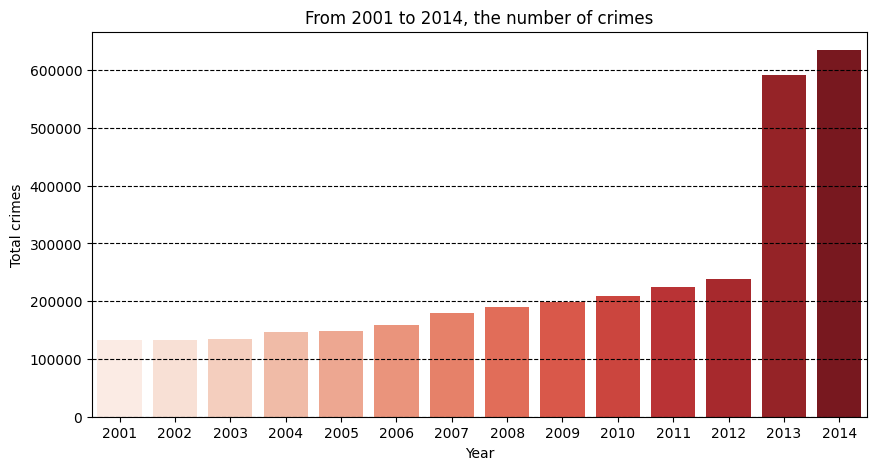

In [52]:
# from 2001 to 2014 put into list, convert to array
temp_list = []
for year in range(2001, 2015):
    temp_list.append(year)
temp_arr = np.array(temp_list)

# visualization
plt.figure(figsize = (10, 5))
plt.axes().grid(axis = 'y', linestyle = '--', color = 'black')

sns.barplot(data = new_crimes_types, x = temp_arr, y = 'total_crimes', palette = 'Reds')
plt.xlabel('Year')
plt.ylabel('Total crimes')
plt.title('From 2001 to 2014, the number of crimes', fontsize = 12)
plt.show()

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;According to above bar chart, there was a slight increase in the number of crimes from 2001 to 2012. In addition, the number of crimes grow up significantly from 2012 to 2014, and it reached the peak in 2014.</p><h4>
</div>

### Problem: What about each crime type trend from 2001 to 2014?
### Coding and visualization

#### Rape

In [53]:
Each_year_rape = crimes_df.groupby('Year')['Rape'].sum().reset_index()
Each_year_rape.columns = ['Year', 'Rape count']
Each_year_rape.head()

,Year,Rape count
0,2001,16456
1,2002,16776
2,2003,16337
3,2004,18784
4,2005,19017


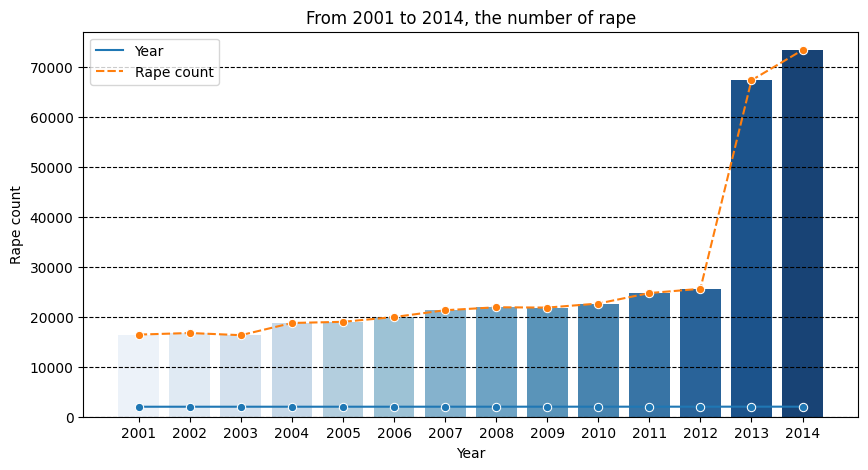

In [54]:
plt.figure(figsize = (10, 5))
plt.axes().grid(axis = 'y', linestyle = '--', color = 'black')

sns.barplot(data = Each_year_rape, x = 'Year', y = 'Rape count', palette = 'Blues')
sns.lineplot(data = Each_year_rape, color = 'r', marker = 'o', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Rape count')
plt.title('From 2001 to 2014, the number of rape', fontsize = 12)
plt.show()

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;It is clear that the trend of graph are upward with the most striking feature being the rising dramatically to a peak of about 74000 from 2012 to 2014. And it produced double more than before 2012.</p><h4>
</div>

#### Kidnapping and Abduction

In [55]:
Each_year_Dowry_Deaths = crimes_df.groupby('Year')['Dowry Deaths'].sum().reset_index()
Each_year_Dowry_Deaths.columns = ['Year', 'Dowry Deaths count']
Each_year_Dowry_Deaths.head()

,Year,Dowry Deaths count
0,2001,6964
1,2002,6957
2,2003,6338
3,2004,7152
4,2005,6901


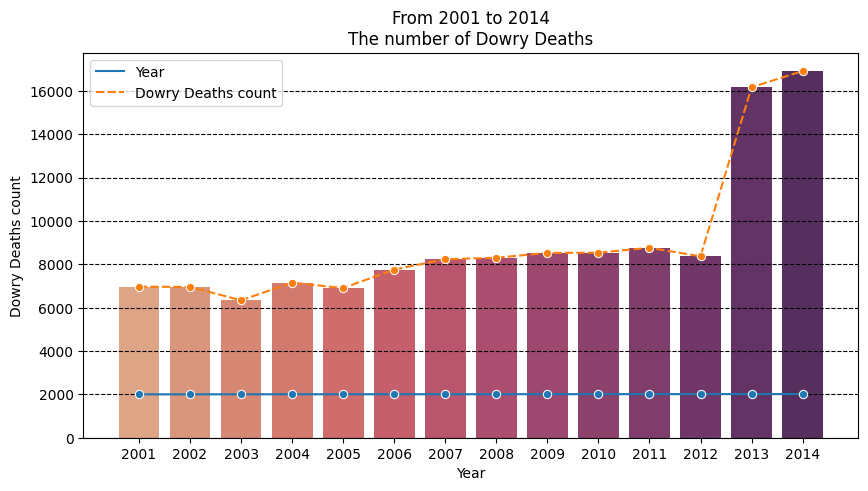

In [56]:
plt.figure(figsize = (10, 5))
AXES = plt.axes()
AXES.grid(axis = 'y', linestyle = '--', color = 'black')

sns.barplot(data = Each_year_Dowry_Deaths, x = 'Year', y = 'Dowry Deaths count', palette = 'flare')
sns.lineplot(data = Each_year_Dowry_Deaths, color = 'r', marker = 'o', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Dowry Deaths count')
plt.title('From 2001 to 2014\nThe number of Dowry Deaths', fontsize = 12)
plt.show()

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;Starting from about 7000 number of dowry deaths in 2001, this figure rose slightly to a highest point about 17000 in 2014.There was about double number of dowry deaths in 2014 than before 2012.</p><h4>
</div>

#### Assault on women with intent to outrage her modesty

In [57]:
Each_year_K_A = crimes_df.groupby('Year')['Assault on women with intent to outrage her modesty'].sum().reset_index()
Each_year_K_A.columns = ['Year', 'Assault on women with intent to outrage her modesty count']
Each_year_K_A.head()

,Year,Assault on women with intent to outrage her modesty count
0,2001,34626
1,2002,34389
2,2003,33428
3,2004,35168
4,2005,34937


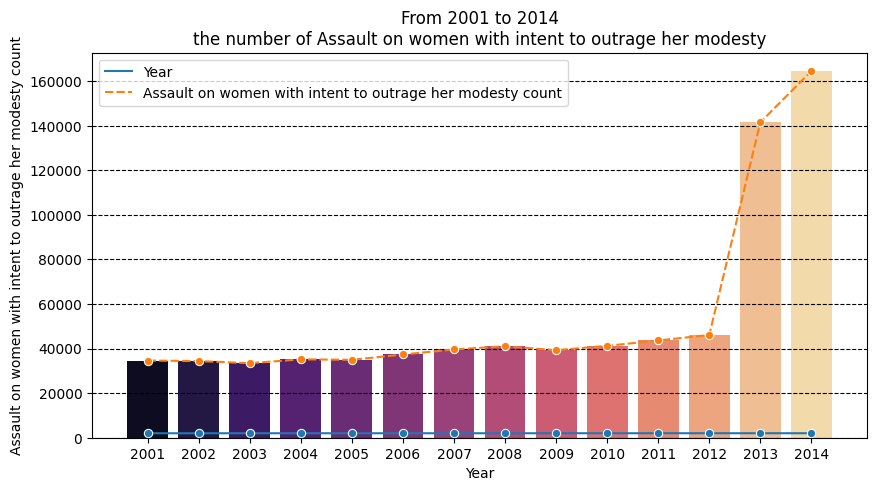

In [58]:
plt.figure(figsize = (10, 5))
plt.axes().grid(axis = 'y', linestyle = '--', color = 'black')

sns.barplot(data = Each_year_K_A, x = 'Year', y = 'Assault on women with intent to outrage her modesty count', palette = 'magma')
sns.lineplot(data = Each_year_K_A, color = 'r', marker = 'o', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Assault on women with intent to outrage her modesty count')
plt.title('From 2001 to 2014\nthe number of Assault on women with intent to outrage her modesty', fontsize = 12)
plt.show()

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;The trend of this figure is same as previous data, furthermore, it's highest point reach about 164000. Especially, there was a huge gap between before 2012 and after 2012. The amount of assault on women with intent to outrage her modesty in 2014 was three times more than that before 2012.</p><h4>
</div>

#### Insult to modesty of Women

In [59]:
Each_year_I_M_W = crimes_df.groupby('Year')['Insult to modesty of Women'].sum().reset_index()
Each_year_I_M_W.columns = ['Year', 'Insult to modesty of Women count']
Each_year_I_M_W.head()

,Year,Insult to modesty of Women count
0,2001,9836
1,2002,10283
2,2003,12430
3,2004,10131
4,2005,10209


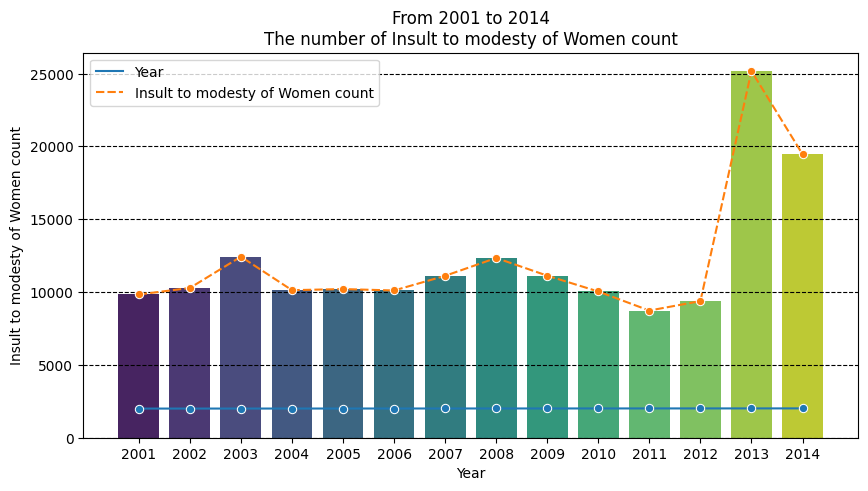

In [60]:
plt.figure(figsize = (10, 5))
plt.axes().grid(axis = 'y', linestyle = '--', color = 'black')

sns.barplot(data = Each_year_I_M_W, x = 'Year', y = 'Insult to modesty of Women count', palette = 'viridis')
sns.lineplot(data = Each_year_I_M_W, color = 'r', marker = 'o', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Insult to modesty of Women count')
plt.title('From 2001 to 2014\nThe number of Insult to modesty of Women count', fontsize = 12)
plt.show()

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;Starting at 10000, the number of insult to modesty of women count had fluctuated around this level in the first twelve year before rising abruptly to 25000 in 2013, moreover it has a significant dropped at 18500 in 2014.</p><h4>
</div>

#### Cruelty by Husband or his Relatives

In [61]:
Each_year_C_H_R = crimes_df.groupby('Year')['Cruelty by Husband or his Relatives'].sum().reset_index()
Each_year_C_H_R.columns = ['Year', 'Cruelty by Husband or his Relatives	count']
Each_year_C_H_R.head()

,Year,Cruelty by Husband or his Relatives\tcount
0,2001,49308
1,2002,49372
2,2003,51914
3,2004,59375
4,2005,59643


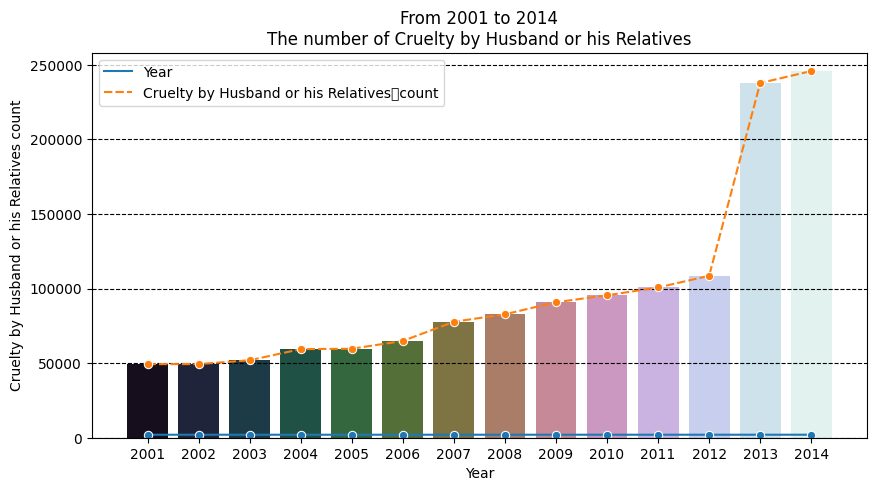

In [62]:
plt.figure(figsize = (10, 5))
plt.axes().grid(axis = 'y', linestyle = '--', color = 'black')

sns.barplot(data = Each_year_C_H_R, x = 'Year', y = 'Cruelty by Husband or his Relatives	count', palette = 'cubehelix')
sns.lineplot(data = Each_year_C_H_R, marker = 'o', linestyle = '-')
plt.xlabel('Year')
plt.ylabel('Cruelty by Husband or his Relatives count')
plt.title('From 2001 to 2014\nThe number of Cruelty by Husband or his Relatives', fontsize = 12)
plt.show()

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;From 2001 to 2012, there was a gradual growth, in addition, the number of cruelty by husband or his relatives reached its peak at 245000 in 2014.</p><h4>
</div>

#### Importation of Girls

In [63]:
Each_year_I_G = crimes_df.groupby('Year')['Importation of Girls'].sum().reset_index()
Each_year_I_G.columns = ['Year', 'Importation of Girls count']
Each_year_I_G.head()

,Year,Importation of Girls count
0,2001,114
1,2002,76
2,2003,46
3,2004,89
4,2005,150


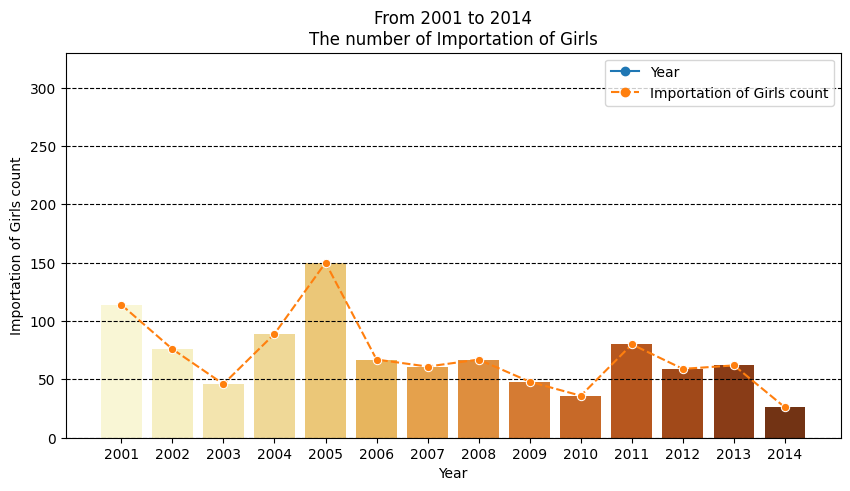

In [64]:
plt.figure(figsize = (10, 5))
plt.axes().grid(axis = 'y', linestyle = '--', color = 'black')

sns.barplot(data = Each_year_I_G, x = 'Year', y = 'Importation of Girls count', palette = 'YlOrBr')
sns.lineplot(data = Each_year_I_G, markers = 'o', linestyle = '-')
plt.xlabel('Year')
plt.ylabel('Importation of Girls count')
plt.ylim([0,330])
plt.title('From 2001 to 2014\nThe number of Importation of Girls', fontsize = 12)
plt.show()

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;The number of importation of girls decreased rapidly at 50 in 2003. However, the 2003s witnessed a considerable growth, and then a peak of 150 took place 2005, followed by a sharp fall over the next 5 period. Although there was a marginally increased at 75 in 2011, yet, it reached lowest point at 25 in 2014.<br>&nbsp;&nbsp;&nbsp;</p><h4>
</div>

### Problem: Which region has the most number of crime?
### Coding and visualization

In [65]:
# Top 5 'STATE/UT' with number of crimes
state_df = pd.DataFrame()
for index in crimes_types:
    state_df[index] = total_DF.groupby(['STATE/UT'])[index].sum()
head_state_df = state_df.sort_values('total_crimes', ascending = False).head(10)
head_state_df

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
STATE/UT,,,,,,,,
UTTAR PRADESH,32092,88316,33432,61514,26619,116121,3,358097
WEST BENGAL,27089,39385,7136,44037,3794,213456,140,335037
ANDHRA PRADESH,18671,19568,7629,74953,50833,161899,17,333570
RAJASTHAN,29886,41607,6788,52509,440,162099,8,293337
MADHYA PRADESH,54909,26365,12054,115600,11647,62847,74,283496
MAHARASHTRA,30988,19515,5447,75485,20524,112839,4,264802
ASSAM,24012,39154,1992,24636,142,75912,14,165862
DELHI,20312,46586,3758,30742,7928,42834,2,152162
KERALA,12583,2554,399,48948,4626,65552,0,134662


Text(0.5, 1.0, 'Top 10 number of crimes in each STATE/UT')

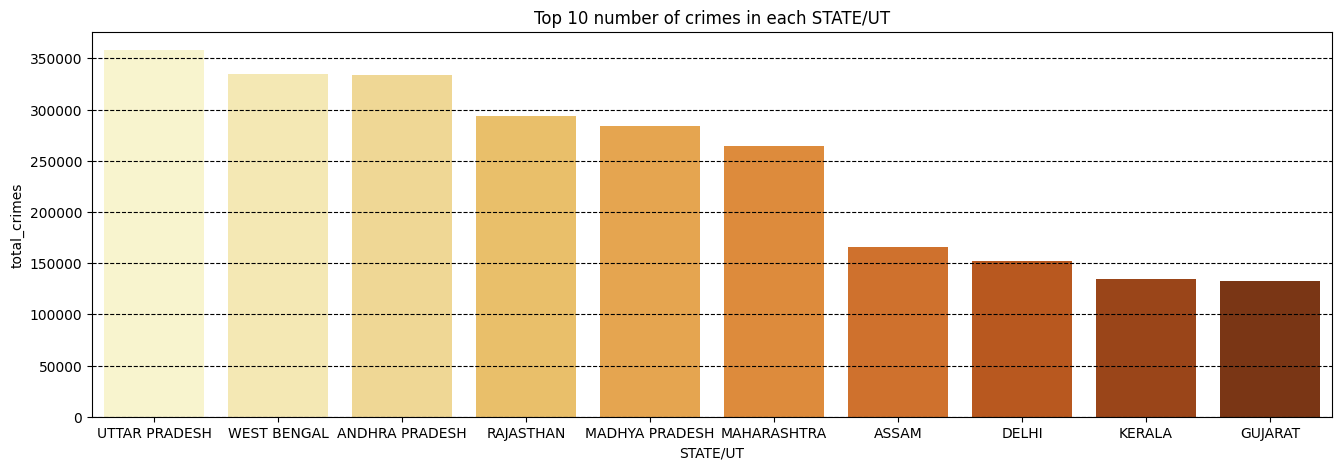

In [66]:
plt.figure(figsize = (16, 5))
plt.axes().grid(axis = 'y', linestyle = '--', color = 'black')

sns.barplot(data = head_state_df, x = head_state_df.index, y = 'total_crimes', palette = 'YlOrBr')
plt.title('Top 10 number of crimes in each STATE/UT')

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;UTTAR PRADESH has the highest number of crimes in India. WEST BENGAL has the second highest number of crimes. ANDHRA PRADESH has the third highest number of crimes and is similar to WEST BENGAL which has the second highest.<br>&nbsp;&nbsp;&nbsp;</p><h4>
</div>

### Problem: In UTTAR PRADESH region, what about each crimes trend year by year?
### Coding and visualization

In [67]:
# Top 1 'UTTAR PRADESH', from 2001 to 2014, its change.
Total_UP_DF = total_DF.loc[total_DF['STATE/UT'] == 'UTTAR PRADESH']
UP_DF = pd.DataFrame()
for index in crimes_types:
    UP_DF[index] = Total_UP_DF.groupby(['Year'])[index].sum()

UP_DF.head()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,1958,2879,2211,2870,2575,7365,0,19858
2002,1415,2298,1893,2145,1887,5679,0,15317
2003,911,1499,1322,1098,4970,2626,0,12426
2004,1397,2324,1708,1900,2682,4950,3,14964
2005,1217,2256,1564,1835,2881,4505,0,14258


In [68]:
fig = make_subplots(rows = 4, cols = 2,
                    subplot_titles=("Rape",
                                    "Dowry Deaths",
                                    "Kidnapping and Abduction",
                                    "Assault on women to outrage",
                                    "Insult to modesty of Women",
                                    "Cruelty by Husband or his Relatives",
                                    "Importation of Girls", 
                                    "total_crimes"))

fig.add_trace(go.Scatter(x = UP_DF.index, y = UP_DF['Rape']), row = 1, col = 1)
fig.add_trace(go.Scatter(x = UP_DF.index, y = UP_DF['Dowry Deaths']), row = 1, col = 2)
fig.add_trace(go.Scatter(x = UP_DF.index, y = UP_DF['Kidnapping and Abduction']), row = 2, col = 1)
fig.add_trace(go.Scatter(x = UP_DF.index, y = UP_DF['Assault on women with intent to outrage her modesty']), row = 2, col = 2)
fig.add_trace(go.Scatter(x = UP_DF.index, y = UP_DF['Insult to modesty of Women']), row = 3, col = 1)
fig.add_trace(go.Scatter(x = UP_DF.index, y = UP_DF['Cruelty by Husband or his Relatives']), row = 3, col = 2)
fig.add_trace(go.Scatter(x = UP_DF.index, y = UP_DF['Importation of Girls']), row= 4 , col = 1)
fig.add_trace(go.Scatter(x = UP_DF.index, y = UP_DF['total_crimes']), row = 4, col = 2)
fig.update_layout(height=900, showlegend = False)
fig.show()


<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;From figure rape, dowry deaths, kidnapping and abduction, assault on women to outrage, cruelty by husband or his relatives, these figures show that a similar trend, before 2012, it has a steady rise, furthermore, there was a dramatic go up and reached the peak in 2014.<br>&nbsp;&nbsp;&nbsp;As can be seen from the figure insult to modesty of women, a sharp fall in 2001, however the 2002s witnessed a dramatic rise, and then a peak of 5000 took place in 2003, followed by a sharp fall in 2004, and it remained stable over the next five-year period. After that, there was a significant decrease in 2010 and hit a low of the number of insult to modesty of women and remained it at the end of the period.<br>&nbsp;&nbsp;&nbsp;According to the chart importation of girls, we can see that just between 2003 and 2005, it increased rapidly at 3, yet it return back to 0.</p><h4>
</div>

### Problem: What relationships between location and Importation of girls?

In [69]:
head_state_df = state_df.sort_values('Importation of Girls', ascending = False).head(10)
head_state_df['Importation of Girls']

STATE/UT
BIHAR             464
JHARKHAND         153
WEST BENGAL       140
MADHYA PRADESH     74
KARNATAKA          47
ODISHA             18
ANDHRA PRADESH     17
TAMIL NADU         15
ASSAM              14
RAJASTHAN           8
Name: Importation of Girls, dtype: int64

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;We find that top 5 STATE/UT is BIHAR, JHARKHAND, WEST BENGAL, MADHYA PRADESH, KARNATAKA respectively, and their location are separated in east and south of Indian. Although from 2001 to 2014, the importation of girls in each location is much smaller than other crimes, it is so weird in Indian where is one of the highest crimes in the world.</p><h4>
</div>

### Problem: For each type of crime, which area has more higher/lower crime?
### Coding and visualization(Show on map directly, no numeric data)

In [70]:
# groupby 'STATE/UT' and sum it up
crimes_Area_df = pd.DataFrame()
for index in list(crimes_df.columns)[3:]:
    crimes_Area_df[index] = crimes_df.groupby(['STATE/UT'])[index].sum()
crimes_Area_df.head()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,
ANDAMAN AND NICOBAR ISLANDS,227,135,14,386,69,167,0
ANDHRA PRADESH,18671,19568,7629,74953,50833,161899,17
ARUNACHAL PRADESH,816,912,4,1212,30,309,0
ASSAM,24012,39154,1992,24636,142,75912,14
BIHAR,17634,37697,18658,9382,468,44090,464


In [71]:
# create latitude and longitude for maps, each 'STATE/UT' latitude and longtitude
lat_long = {'STATE/UT' : ['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
            'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU',
            'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR',
            'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
            'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB',
            'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH',
            'UTTARAKHAND', 'WEST BENGAL'],
            'lat' : [11.68, 14.90, 27.06, 26.14, 25.4, 30.45, 21.25, 20.27, 20.42, 28.36,
            15.50, 23.22, 30.44, 31.61, 32.44, 23.35, 15.19, 10.00, 10.57, 23.28, 18.97,
            24.44, 25.57, 23.36, 25.67, 20.27, 11.55, 30.79, 26.60, 27.33, 11.52, 17.82,
            23.84, 26.85, 30.33, 22.34],                                 
            'long' : [92.77, 79.09, 93.37, 91.77, 85.1, 76.47, 81.60, 73.02, 72.83, 77.13,
            73.83, 72.66, 76.47, 77.10, 75.54, 85.33, 75.42, 76.00, 72.64, 77.56, 72.82,
            93.58, 91.88, 92.80, 94.12, 85.82, 79.49, 75.84, 73.80, 88.30, 78.75, 79.18,
            91.28, 80.91, 78.06, 88.22]}                              
lat_long = pd.DataFrame(lat_long)

In [72]:
# merge lat_long dataframe and crimes_Area_df to a new dataframe
lat_long_crimes_DF = pd.merge(crimes_Area_df, lat_long, how = 'outer', on = ['STATE/UT'])
lat_long_crimes_DF

In [73]:
# get all crimes 
Location_crimes = lat_long_crimes_DF.iloc[0 : 35, :]

incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(lat_long_crimes_DF.lat, Location_crimes.long):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color = 'yellow',
            fill = True,
            fill_color = 'red',
            fill_opacity = 0.4
        )
    )

# Add incidents to map
san_map = folium.Map(width = 1000, height = 600, location = [21.5, 83], zoom_start=5)
san_map.add_child(incidents)

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;From the picture on above, we can see that the crime areas are very widely distributed throughout India</p><h4>
</div>

### Below visualization maps which has much deeper color, it means that these area has more crimes, by contrast, shallower, it means that has lower crimes.

In [74]:
Rape_heat_DF = pd.DataFrame(lat_long_crimes_DF, columns=['lat', 'long', 'Rape'])

map_osm = folium.Map(width = 1000, height = 600, location = [21.5, 83], zoom_start=5)
gradient = {.20: '#FFFBC1', .40: '#FFE15D', .60: '#F49D1A', .80: '#DC3535', 1: '#B01E68'}
HeatMap(Rape_heat_DF, gradient = gradient).add_to(map_osm)
map_osm

In [75]:
KADD_heat_DF = pd.DataFrame(lat_long_crimes_DF, columns=['lat', 'long', 'Kidnapping and Abduction'])			
map_osm = folium.Map(width = 1000, height = 600, location = [21.5, 83], zoom_start=5)
gradient = {.20: '#FFFBC1', .40: '#FFE15D', .60: '#F49D1A', .80: '#DC3535', 1: '#B01E68'}
HeatMap(KADD_heat_DF, gradient = gradient).add_to(map_osm)
map_osm

In [76]:
KADD_heat_DF = pd.DataFrame(lat_long_crimes_DF, columns=['lat', 'long', 'Dowry Deaths'])				

map_osm = folium.Map(width = 1000, height = 600, location = [21.5, 83], zoom_start=5)
gradient = {.20: '#FFFBC1', .40: '#FFE15D', .60: '#F49D1A', .80: '#DC3535', 1: '#B01E68'}
HeatMap(KADD_heat_DF, gradient = gradient).add_to(map_osm)
map_osm

In [77]:
AWIOM_heat_DF = pd.DataFrame(lat_long_crimes_DF, columns=['lat', 'long', 'Assault on women with intent to outrage her modesty'])

map_osm = folium.Map(width = 1000, height = 600, location = [21.5, 83], zoom_start=5)
gradient = {.20: '#FFFBC1', .40: '#FFE15D', .60: '#F49D1A', .80: '#DC3535', 1: '#B01E68'}
HeatMap(AWIOM_heat_DF, gradient = gradient).add_to(map_osm)
map_osm

In [78]:
IMW_heat_DF = pd.DataFrame(lat_long_crimes_DF, columns=['lat', 'long', 'Insult to modesty of Women'])

map_osm = folium.Map(width = 1000, height = 600, location = [21.5, 83], zoom_start=5)
gradient = {.20: '#FFFBC1', .40: '#FFE15D', .60: '#F49D1A', .80: '#DC3535', 1: '#B01E68'}
HeatMap(IMW_heat_DF, gradient = gradient).add_to(map_osm)
map_osm

In [79]:
CHR_heat_DF = pd.DataFrame(lat_long_crimes_DF, columns=['lat', 'long', 'Cruelty by Husband or his Relatives'])

map_osm = folium.Map(width = 1000, height = 600, location = [21.5, 83], zoom_start=5)
gradient = {.20: '#FFFBC1', .40: '#FFE15D', .60: '#F49D1A', .80: '#DC3535', 1: '#B01E68'}
HeatMap(CHR_heat_DF, gradient = gradient).add_to(map_osm)
map_osm

In [80]:
IG_heat_DF = pd.DataFrame(lat_long_crimes_DF, columns=['lat', 'long', 'Importation of Girls'])

map_osm = folium.Map(width = 1000, height = 600, location = [21.5, 83], zoom_start=5)
gradient = {.20: '#FFFBC1', .40: '#FFE15D', .60: '#F49D1A', .80: '#DC3535', 1: '#B01E68'}
HeatMap(IG_heat_DF, gradient = gradient).add_to(map_osm)
map_osm

### Problem: What relationship between each crime?
### Coding and visualization

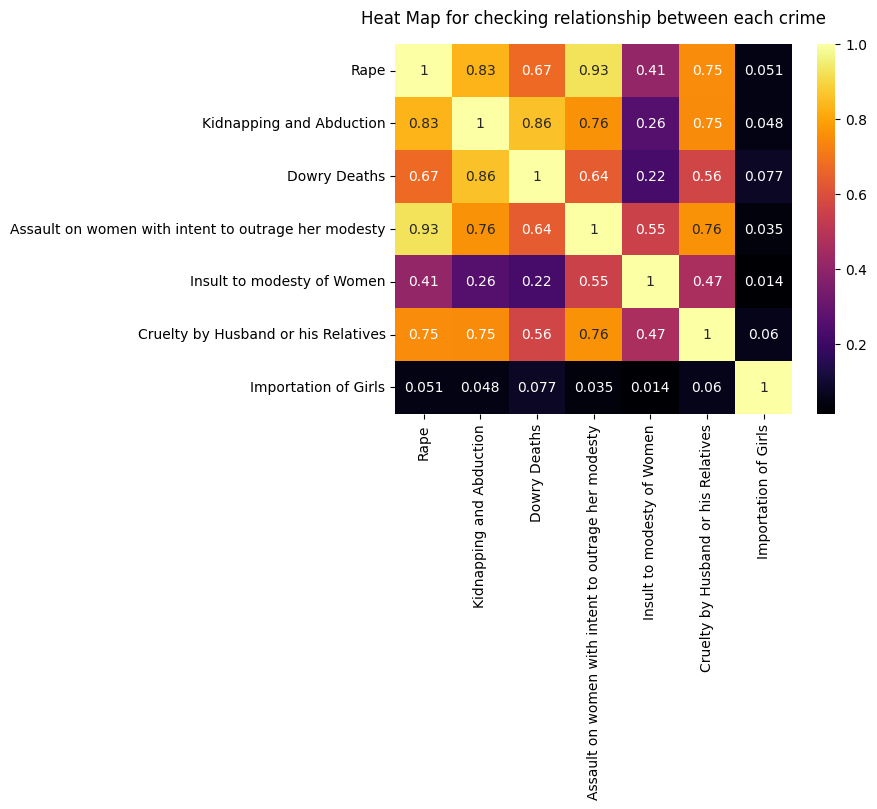

In [81]:
heatmap_crimes_df = crimes_df.drop('Year', axis = 1)     # drop 'Year', it has numeric value
sns.heatmap(heatmap_crimes_df.corr(), annot = True, cmap = 'inferno')     
plt.title("Heat Map for checking relationship between each crime", pad = 15)
plt.show()

<div>
    <h3>Analysis<h3>
    <h4><p>&nbsp;&nbsp;&nbsp;From above heat map, we can know that there are several strong relationships between some combination of crimes:<br>&nbsp;&nbsp;&nbsp;Rape, kidnapping and abduction, assault on women with intent to outrage her modesty, cruelty by husband or his relatives.<br>&nbsp;&nbsp;&nbsp;Kidnapping and abduction, rape, dowry deaths.</p><h4>
</div>

<div>
    <h2>Conclusion<h2>
    <h4><p>&nbsp;&nbsp;&nbsp;First, our group searched some related information from 2012 to 2014 in India.<br>&nbsp;&nbsp;&nbsp;Economic Events: India's economy grew at its slowest pace in nine years in the first quarter of 2012, hit by contagion from Europe's debt crisis and weak domestic policies. Meanwhile, India's coalition government is under intense pressure from scandals and defections from its coalition partners. Protesters blocked roads and railways during a nationwide strike over economic reforms in 2012. Because the economic downturn affects the employment problem of the society, a large number of unemployed people give rise to the high crime rate, which indirectly leads to the rampant rape cases.<br>&nbsp;&nbsp;&nbsp;Ref:&nbsp;<a href = "https://www.indiatoday.in/magazine/yearender-2011/hopes-from-2012/story/20120109-indian-economy-in-2012-750176-2011-12-29">https://www.indiatoday.in/magazine/yearender-2011/hopes-from-2012/story/20120109-indian-economy-in-2012-750176-2011-12-29</a><br>&nbsp;&nbsp;&nbsp;Social Events: The gang-rape case in 2012 led to more feminist resistance in India, and also stimulated the dissatisfaction of traditional Indian men, which led to the increase of crime rate.<br>&nbsp;&nbsp;&nbsp;Ref:&nbsp;<a href = "https://www.indiatoday.in/india/story/24-more-rapes-per-day-since-nirbhaya-was-gangraped-in-2012-1657646-2020-03-19">https://www.indiatoday.in/india/story/24-more-rapes-per-day-since-nirbhaya-was-gangraped-in-2012-1657646-2020-03-19</a><br>&nbsp;&nbsp;&nbsp;So maybe these information can explain why there was a significant rose from 2012 to 2014. Not only in Indian, but also all around the world, we hope that women who can be paid more attention and care.</p><h4>
</div>